In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Nov.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Feb.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Oct.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2019-Dec.csv
/kaggle/input/ecommerce-events-history-in-cosmetics-shop/2020-Jan.csv


In [2]:
# load the datasets for the last three months of the year
df1 = pd.read_csv('../input/ecommerce-events-history-in-cosmetics-shop/2019-Oct.csv')
df2 = pd.read_csv('../input/ecommerce-events-history-in-cosmetics-shop/2019-Nov.csv')
df3 = pd.read_csv('../input/ecommerce-events-history-in-cosmetics-shop/2019-Dec.csv')


In [3]:
# concatenate all the datasets togethr into one table
cf = pd.concat([df1,df2,df3], ignore_index = True)

In [4]:
cf.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [5]:
cf.isnull().sum()/3533286 *100

event_time         0.000000
event_type         0.000000
product_id         0.000000
category_id        0.000000
category_code    341.600312
brand            145.914568
price              0.000000
user_id            0.000000
user_session       0.063086
dtype: float64

In [6]:
# check for duplicate rows
sum(cf.duplicated())

643708

In [7]:
# drop all duplicate rows
cf.drop_duplicates(inplace = True)

![](http://)

In [8]:
sum(cf.duplicated())

0

In [9]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11627698 entries, 0 to 12271405
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 887.1+ MB


In [10]:
cf

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
12271401,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
12271402,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d
12271403,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753
12271404,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc


In [11]:
cf['event_time'] = cf['event_time'].apply(lambda x:x[:-4])

In [12]:
cf['event_time'] = pd.to_datetime(cf['event_time'])

In [13]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11627698 entries, 0 to 12271405
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 887.1+ MB


In [14]:
# check the percentage of missing values for each column
cf.isnull().sum()/3533286 *100

event_time         0.000000
event_type         0.000000
product_id         0.000000
category_id        0.000000
category_code    323.552382
brand            138.100454
price              0.000000
user_id            0.000000
user_session       0.057822
dtype: float64

In [15]:
cf['brand'].fillna('generic', inplace= True)

In [16]:
cf['Month']= cf['event_time'].dt.month_name()

In [17]:
cf['day'] = cf['event_time'].dt.day_name()

In [18]:
cf['day_number'] = cf['event_time'].dt.day

In [19]:
cf

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Month,day,day_number
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,October,Tuesday,1
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,October,Tuesday,1
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,October,Tuesday,1
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,October,Tuesday,1
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,October,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12271401,2019-12-31 23:59:39,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,December,Tuesday,31
12271402,2019-12-31 23:59:46,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,December,Tuesday,31
12271403,2019-12-31 23:59:51,view,59975,1487580012096782476,NaN,generic,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,December,Tuesday,31
12271404,2019-12-31 23:59:52,view,5775982,1783999063314661546,NaN,generic,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,December,Tuesday,31


In [20]:
bar_graph = cf[cf['event_type']== 'purchase'].groupby(['Month'])['price'].sum().to_frame()

In [21]:
bar_graph.reset_index(inplace= True)

# How has revenue changed over the last three months

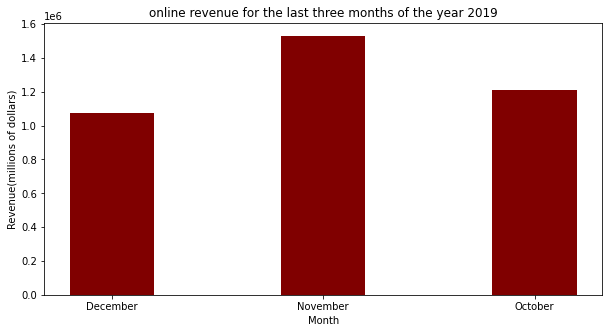

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph['Month'], bar_graph['price'], color ='maroon',
        width = 0.4)
plt.xlabel("Month")
plt.ylabel('Revenue(millions of dollars)')
plt.title("online revenue for the last three months of the year 2019")
plt.show()

# Top 5 Brands that were purchased by revenue

In [23]:
bar_graph2 = cf[cf['event_type']== 'purchase'].groupby('brand')['price'].sum().to_frame().sort_values(by='price',ascending= False).reset_index().head(5)

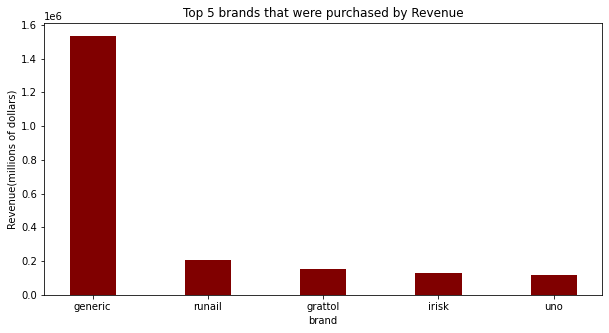

In [24]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph2['brand'], bar_graph2['price'], color ='maroon',
        width = 0.4)
plt.xlabel("brand")
plt.ylabel('Revenue(millions of dollars)')
plt.title("Top 5 brands that were purchased by Revenue")
plt.show()

#### Top 5 brands that were purchased by quantity

In [25]:
 bar_graph3 = cf[cf['event_type']== 'purchase'].groupby('brand')['price'].count().to_frame().sort_values(by='price',ascending= False).reset_index().head()

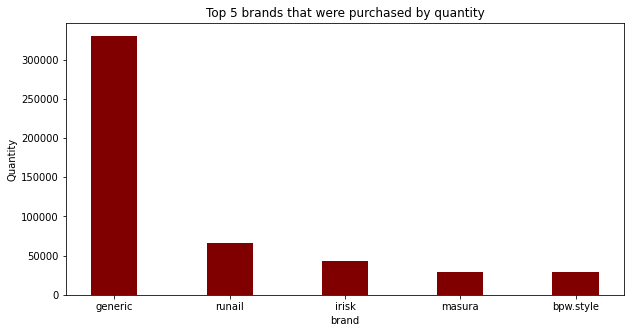

In [26]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph3['brand'], bar_graph3['price'], color ='maroon',
        width = 0.4)
plt.xlabel("brand")
plt.ylabel('Quantity')
plt.title("Top 5 brands that were purchased by quantity")
plt.show()

# Top 5 brands that have the least revenue

In [27]:
bar_graph4 = cf[cf['event_type']== 'purchase'].groupby('brand')['price'].sum().to_frame().sort_values(by='price',ascending= True).reset_index().head()

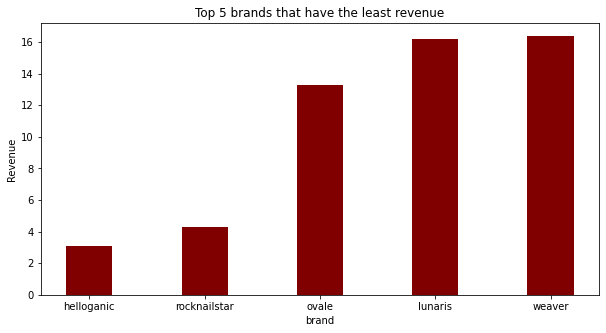

In [28]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph4['brand'], bar_graph4['price'], color ='maroon',
        width = 0.4)
plt.xlabel("brand")
plt.ylabel('Revenue')
plt.title("Top 5 brands that have the least revenue")
plt.show()

# Top 5 brands that have the most views

In [29]:
bar_graph5 = cf[cf['event_type']== 'view'].groupby('brand')['product_id'].count().to_frame().reset_index().sort_values(by='product_id', ascending= False).head()

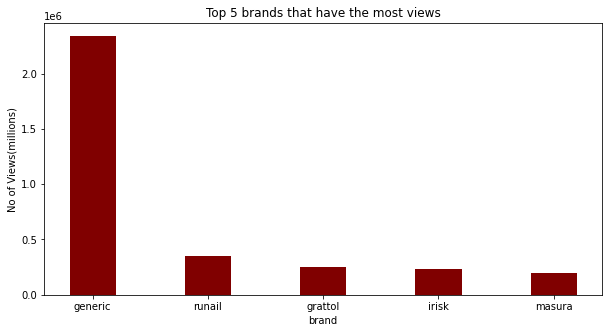

In [42]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph5['brand'], bar_graph5['product_id'], color ='maroon',
        width = 0.4)
plt.xlabel("brand")
plt.ylabel('No of Views(millions)')
plt.title("Top 5 brands that have the most views")
plt.show()

# Top 5 brands that were viewed the Least

In [31]:
bar_graph6 = cf[cf['event_type']== 'view'].groupby('brand')['product_id'].count().to_frame().reset_index().sort_values(by='product_id', ascending= True).head()

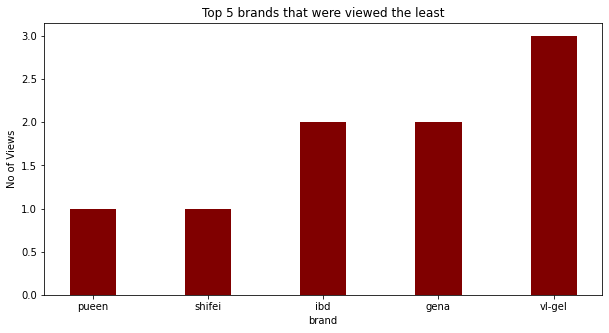

In [32]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph6['brand'], bar_graph6['product_id'], color ='maroon',
        width = 0.4)
plt.xlabel("brand")
plt.ylabel('No of Views')
plt.title("Top 5 brands that were viewed the least")
plt.show()

# Top 5 brands that were removed from cart(i.e were selected but later not bought)

In [33]:
bar_graph7 = cf[cf['event_type']== 'remove_from_cart'].groupby('brand')['product_id'].count().to_frame().reset_index().sort_values(by='product_id', ascending= False).head()

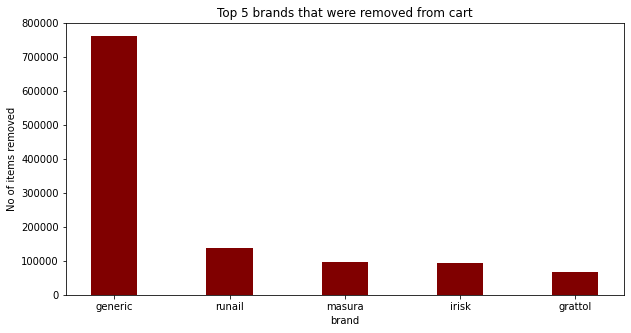

In [34]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph7['brand'], bar_graph7['product_id'], color ='maroon',
        width = 0.4)
plt.xlabel("brand")
plt.ylabel('No of items removed')
plt.title("Top 5 brands that were removed from cart")
plt.show()

# chi-square Test of Independence Analysis

In [35]:
import scipy.stats as stats

In [36]:
# create a pivot table using two variables
crosstab = pd.crosstab(cf['brand'],cf['day'])

In [37]:
crosstab

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
brand,,,,,,,
airnails,6966,6794,5994,6492,8066,8411,7429
almea,371,453,342,467,441,448,482
andrea,40,48,37,54,68,46,70
ardell,1921,2050,1716,1927,1907,1979,2084
art-visage,5290,5006,4507,4795,5711,5381,5452
...,...,...,...,...,...,...,...
ypsed,187,293,174,204,238,180,275
yu-r,227,188,179,242,233,299,213
zab,5,13,12,8,11,16,29


In [38]:
stats.chi2_contingency(crosstab)

(27521.875244166786,
 0.0,
 1542,
 array([[ 7270.33971333,  7228.92053853,  6252.35016458, ...,
          7715.05130732,  7386.87238695,  7456.8144195 ],
        [  435.47815638,   432.99723436,   374.50270965, ...,
           462.11545157,   442.45822002,   446.64760161],
        [   52.62269333,    52.32290149,    45.25448855, ...,
            55.84151429,    53.46615641,    53.9723966 ],
        ...,
        [   13.62681315,    13.5491811 ,    11.71879318, ...,
            14.46033703,    13.84523059,    13.97632309],
        [ 1118.26847481,  1111.8976917 ,   961.68904868, ...,
          1186.67063696,  1136.19264621,  1146.95059882],
        [ 9560.07922067,  9505.61538432,  8221.48142255, ...,
         10144.84942901,  9713.31299454,  9805.28275089]]))

# Top 5 Most popular christmas brands purchased in 2019

In [39]:
bar_graph8 = cf[(cf['Month']== 'December')& (cf['day_number']== 25) & (cf['event_type']=='purchase')].groupby('brand')['product_id'].count().to_frame().reset_index().sort_values(by='product_id', ascending= False).head()

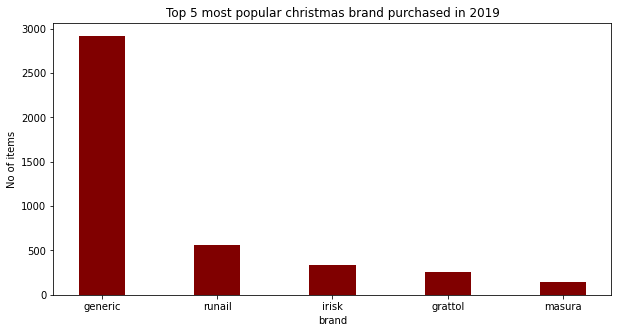

In [40]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bar_graph8['brand'], bar_graph8['product_id'], color ='maroon',
        width = 0.4)
plt.xlabel("brand")
plt.ylabel('No of items')
plt.title("Top 5 most popular christmas brand purchased in 2019")
plt.show()